<a href="https://colab.research.google.com/github/JonatanPolanco/CIG_Da1_Project/blob/main/DA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BMW vehicles Productivity analysis by month, week and day** - Jonatan Polanco CIG Intern

In [ ]:
#importing libraries

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd  
import plotly.express as px   #para los mapas
import seaborn as sns
from numpy import array
from datetime import datetime as dt, date

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import files
from google.colab import drive


**Data Analysis by month**

In [ ]:
#Load data

#zfile = 'detailed_report_by_driver.xlsx'
#df = pd.read_excel(file ,skiprows=11)

#Data pre-processing

#df = df.drop(range(2))
#df = df.drop(['Driver Name'], axis=1)
#df = df.drop(['HYDR(hour)'], axis=1)
#df = df.drop(['TRACK(hour)'], axis=1)
#df = df.drop(['Shut Down'], axis=1)
#df = df.reset_index().drop(['index'], axis=1)
#df = df.dropna()

file = 'edited_detailed_report_by_driver.xlsx'
df = pd.read_excel(file)

#df=df.drop(['Unnamed: 2'], axis=1)
df= df.drop(['Driver Name'], axis=1)
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime("%d/%m/%y")
df['Duration'] = pd.to_timedelta(df['Duration'].astype(str))
df = df.rename(columns={'SEAT(hour)': 'SEAT'})
df['SEAT'] = pd.to_timedelta(df['SEAT'].astype(str))

df.head()

,Date,Vehicle ID,Fleet No,Start Time,End Time,Duration,HYDR(hour),TRACK(hour),SEAT,Shut Down
0,10/07/21,3639,FGA0R-1790-01194,2021-07-10 06:04:33,2021-07-10 06:27:09,0 days 00:22:27,-,-,0 days,Key
1,10/07/21,3639,FGA0R-1790-01194,2021-07-10 06:32:04,2021-07-10 06:35:16,0 days 00:02:56,-,-,0 days,Key
2,10/07/21,3639,FGA0R-1790-01194,2021-07-10 06:51:31,2021-07-10 07:09:10,0 days 00:17:29,-,-,0 days,Key
3,10/07/21,3639,FGA0R-1790-01194,2021-07-10 07:12:51,2021-07-10 07:37:44,0 days 00:24:09,-,-,0 days,Key
4,10/07/21,3639,FGA0R-1790-01194,2021-07-10 07:44:54,2021-07-10 08:21:53,0 days 00:36:06,-,-,0 days,Key


In [ ]:
# Download pre-Processing Dataframe as excel (xlsx) file

#df = df.to_excel("detailed_report_by_driver_BMW.xlsx")
#files.download('detailed_report_by_driver_BMW.xlsx')

In [ ]:

#Productivity analysis by truck (Monthly)

id = df['Vehicle ID']
vehicles = id.drop_duplicates()
vehicles = vehicles.reset_index().drop(['index'], axis=1)
N_Vehicles = len(vehicles)
#print(vehicles,N_Vehicles )

required_hours = 24       # Working hours required by the company
X = [None] * N_Vehicles
X_ = {}   
Day = [None] * N_Vehicles
productivity = [None] * N_Vehicles


#Get total hours by vehicle
for i in range(N_Vehicles):
  
  X[i] = df[df['Vehicle ID'] == vehicles['Vehicle ID'].iloc[i]].Duration.sum()  #Truck duration sum

  X_[i] = df[df['Vehicle ID'] == vehicles['Vehicle ID'].iloc[i]]  #Creates a Dataframe by vehicle
  Day[i] = len(X_[i]['Date'].drop_duplicates())  #Get the work day's by vehicle

  X[i] = (X[i].days + X[i].seconds/86400)*24   #Set to hours
  X[i] = round(X[i], 3)
  productivity[i] = (X[i]/(Day[i]*required_hours))*100  #Monthly productivity calculation
  productivity[i] = round(productivity[i], 2)


vehicles = np.array(vehicles, dtype=str)
#for i in range(N_Vehicles):
  #print(vehicles[i])
  #print(X[i], 'hours')
  #print(Day[i], 'days')
  #print('-----------------')


In [ ]:
productivity_M = pd.DataFrame((X, Day, productivity, vehicles)).T   


productivity_M = productivity_M.rename(columns={3: 'Vehicle ID', 0: 'Hours', 1: 'Days', 2: 'Utilization (%)'})
productivity_M = productivity_M.reindex(columns= ['Vehicle ID', 'Hours', 'Days', 'Utilization (%)'])

productivity_M = productivity_M.sort_values(by = 'Vehicle ID')
productivity_M = productivity_M.reset_index().drop(['index'], axis=1)

#Download utilization data by month (uncomment line 13)

productivity_M.to_excel("Monthly_Vehicle_Productivity.xlsx")
files.download('Monthly_Vehicle_Productivity.xlsx')
productivity_M


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Vehicle ID,Hours,Days,Utilization (%)
0,[17],139.769,26,22.4
1,[24],247.07,29,35.5
2,[31003],45.424,15,12.62
3,[3634],11.371,7,6.77
4,[3635],15.654,9,7.25
5,[3639],123.158,14,36.65
6,[3641],195.622,26,31.35
7,[3642],112.03,24,19.45
8,[3658],24.713,19,5.42
9,[3696],107.843,24,18.72


No handles with labels found to put in legend.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

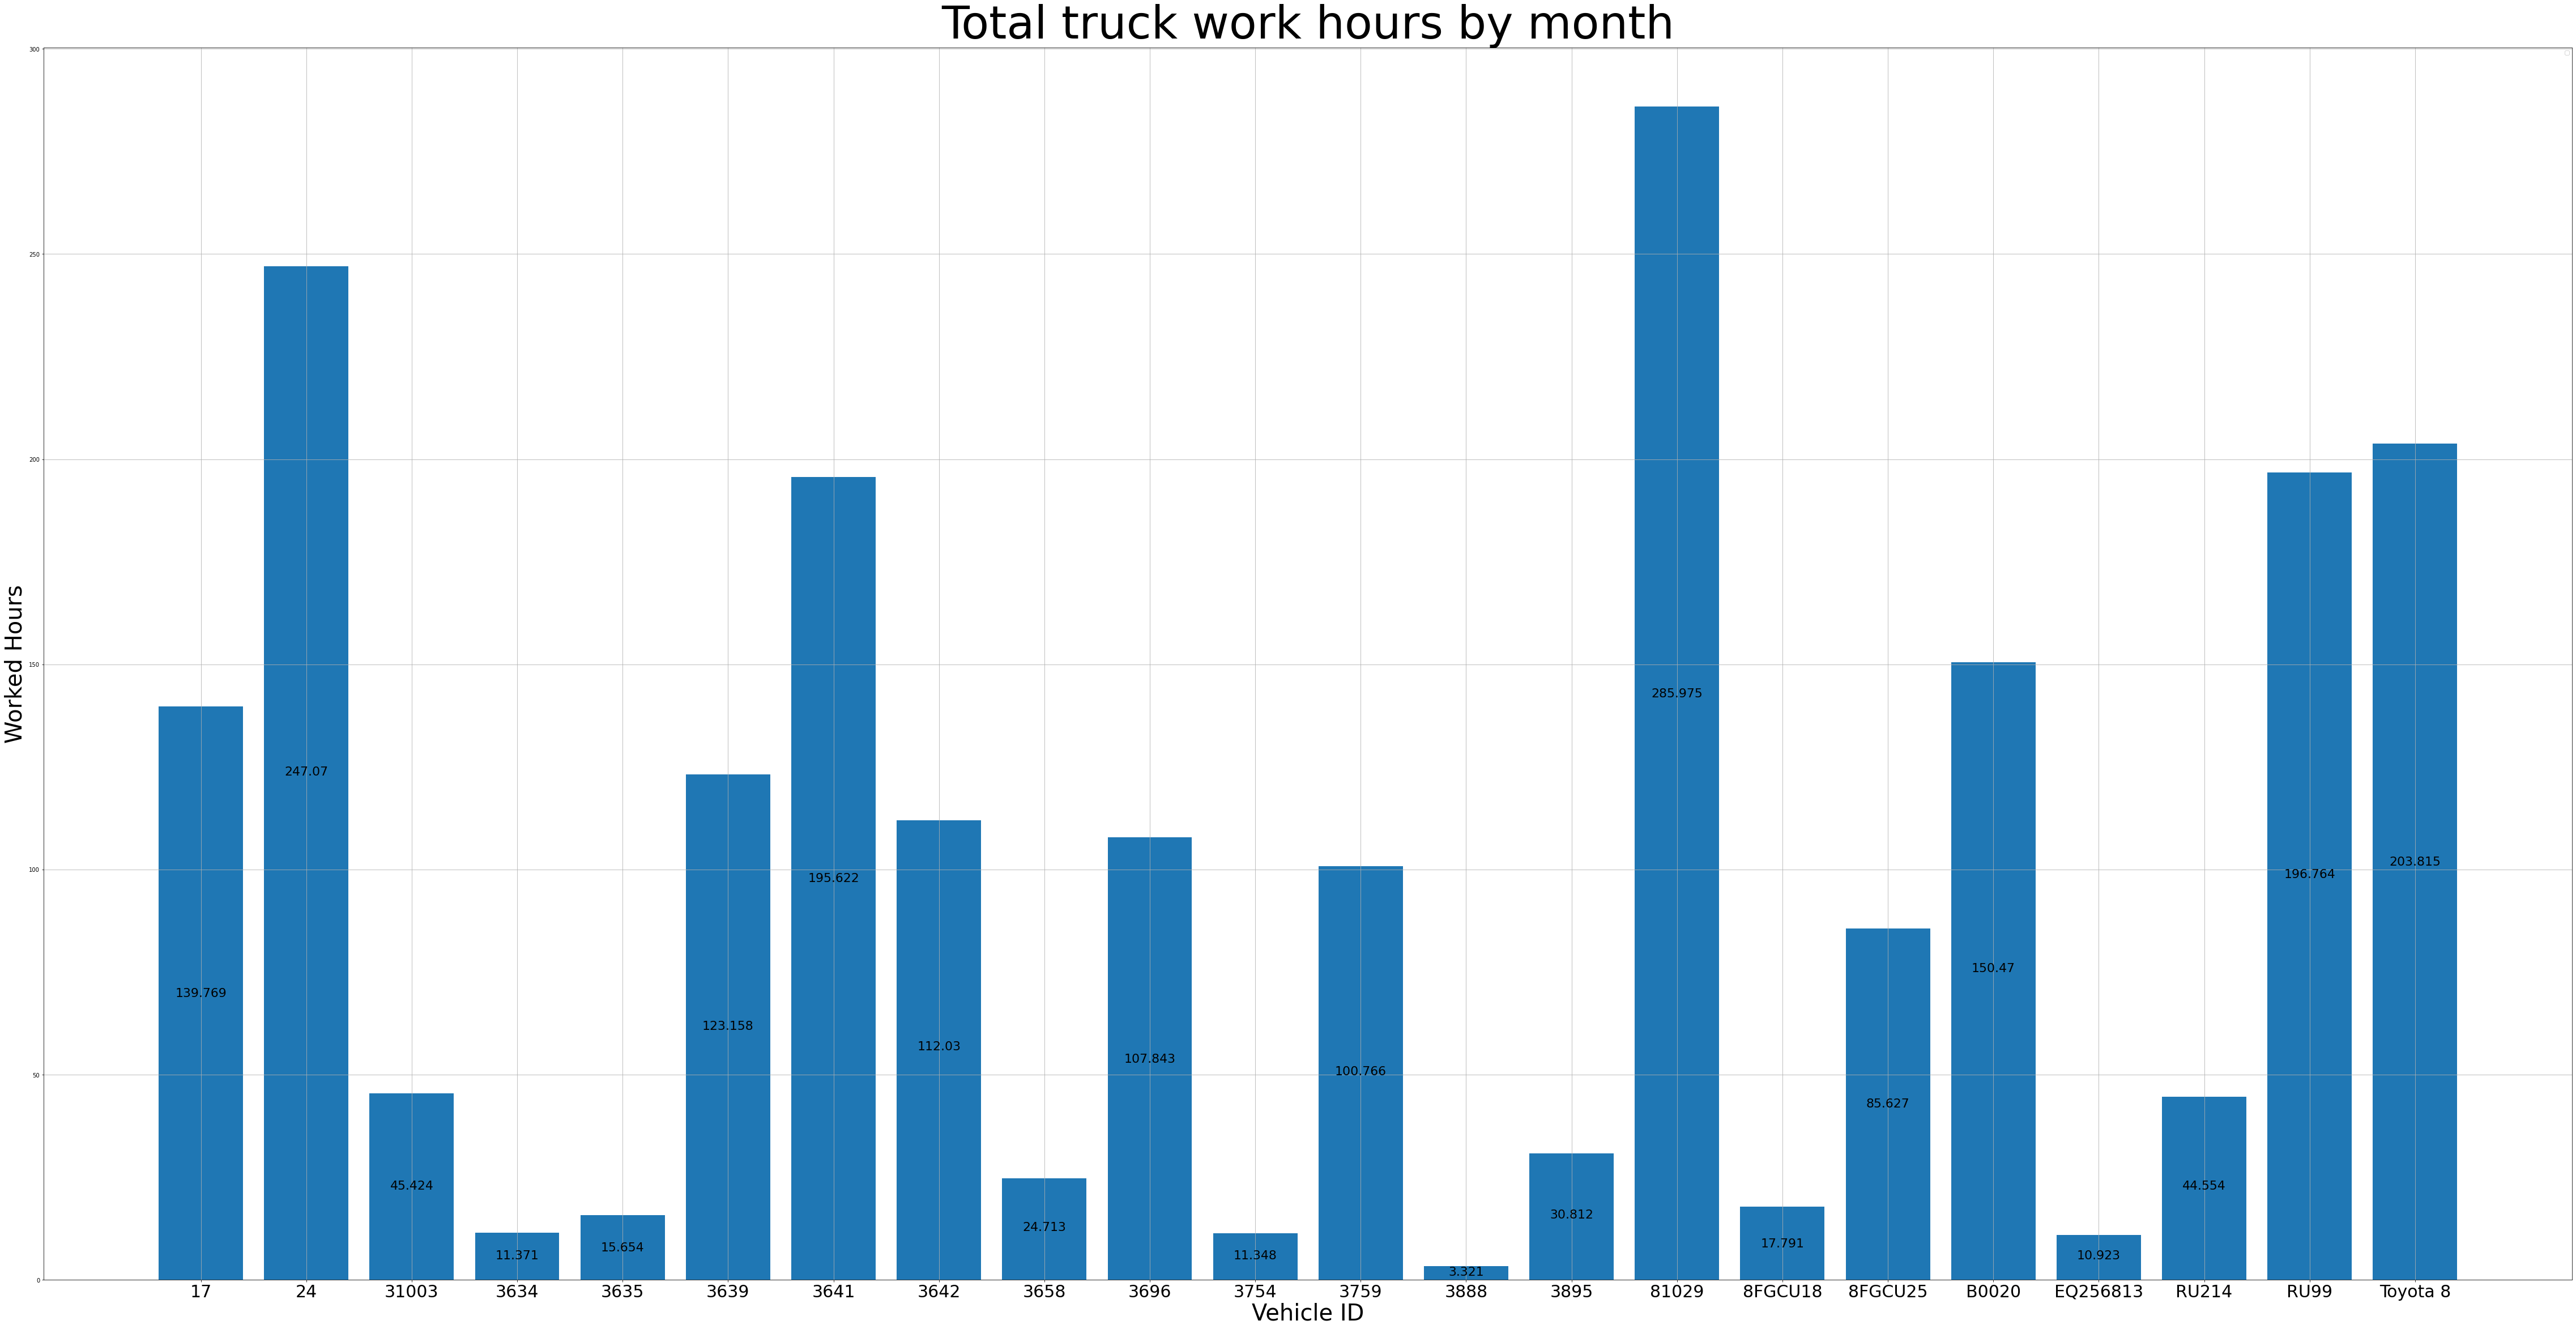

In [ ]:
# Bar plot by hours

def addlabels(x,y):
    for i in range(len(y)):
        plt.text(i, y[i]//2, y[i], ha = 'center', fontsize=22)

y= np.concatenate(productivity_M['Vehicle ID'])
x = productivity_M['Hours']

fig, ax = plt.subplots()
fig.set_size_inches(80, 40)
ax.set_ylabel('Worked Hours', fontsize=40)
ax.set_xlabel('Vehicle ID', fontsize=40)
ax.set_title('Total truck work hours by month', fontsize=80)
ax.legend()

addlabels(y, x)

plt.bar(y, x)
plt.xticks(y, x)
ax.set_xticklabels(y, fontsize=30)
plt.grid(True)
plt.savefig('Monthly_Vehicle_Hours.png', bbox_inches='tight')
files.download('Monthly_Vehicle_Hours.png')
plt.show()

In [ ]:

productivity_M.plot(kind='barh', x= 'Vehicle ID', y= 'Utilization (%)', figsize=(20,20))
plt.grid(True)
plt.savefig('Monthly_Vehicles_Utilization_BMW.png')
files.download('Monthly_Vehicles_Utilization_BMW.png')
plt.show()

#Bar plot by productivity

In [ ]:
productivity_M

**Data Analysis by week**

In [ ]:
#Load data
file_2 = 'edited_report_by_driver_BMW.xlsx'
df2 = pd.read_excel(file_2)

#Data pre-processing
df2=df2.drop(['Unnamed: 0'], axis=1)
df2['Date'] = df2['Date'].dt.strftime("%d/%m/%y")
df2['Duration'] = pd.to_timedelta(df2['Duration'].astype(str))

#Sorting DF by date
df2 = df2.sort_values(by=['Date'], inplace=False, ascending=True)

df2.head()

In [ ]:
#Utilization analysis by truck (Weekly)

id_ = df2['Vehicle ID']
date = df2['Date']
vehicles_ = id_.drop_duplicates()
vehicles_ = vehicles_.reset_index().drop(['index'], axis=1)
N_Vehicles_ = len(vehicles_)

contador =0
x = [None] * N_Vehicles_
#Get month weeks
for i in range(1, 32):
  if i<=9:
    d = str(0)+str(i)
  else:
    d = str(i)

    x = df2[df2['Date'] == '01/08/21']
 
x = pd.DataFrame(x)
x.head(200)